In [ ]:
import numpy as np 
import pandas as pd 
import re
import string


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from collections import Counter
from plotly.subplots import make_subplots
from matplotlib import rcParams

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

In [72]:
df = pd.read_csv("Users\\anshshah\\Downloads\\vaccination_tweets.csv")

In [73]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [74]:
df.shape 

(11020, 16)

In [75]:
df.drop(["id","user_created"],axis=1,inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         11020 non-null  object
 1   user_location     8750 non-null   object
 2   user_description  10341 non-null  object
 3   user_followers    11020 non-null  int64 
 4   user_friends      11020 non-null  int64 
 5   user_favourites   11020 non-null  int64 
 6   user_verified     11020 non-null  bool  
 7   date              11020 non-null  object
 8   text              11020 non-null  object
 9   hashtags          8438 non-null   object
 10  source            11019 non-null  object
 11  retweets          11020 non-null  int64 
 12  favorites         11020 non-null  int64 
 13  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(5), object(7)
memory usage: 1.0+ MB


In [77]:
df.isnull().sum()

user_name              0
user_location       2270
user_description     679
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [78]:
df.isnull().values.sum()

5532

In [79]:
df.describe()

,user_followers,user_friends,user_favourites,retweets,favorites
count,1.102000e+04,11020.000000,1.102000e+04,11020.000000,11020.000000
mean,3.518827e+04,1170.470236,1.533289e+04,1.360436,7.510617
std,2.942509e+05,2798.429673,4.944401e+04,11.364732,51.192608
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.110000e+02,164.000000,4.360000e+02,0.000000,0.000000
50%,4.790000e+02,460.000000,2.323500e+03,0.000000,1.000000
75%,2.171250e+03,1221.000000,1.114075e+04,1.000000,4.000000
max,1.371493e+07,103226.000000,1.213794e+06,678.000000,2315.000000


In [80]:
# Visualisation

<AxesSubplot:>

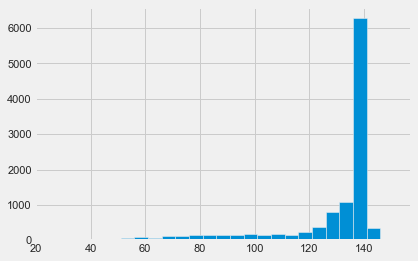

In [81]:
# Let's see the length of the tweets
seq_length = [len(i) for i in df['text']]

pd.Series(seq_length).hist(bins = 25)

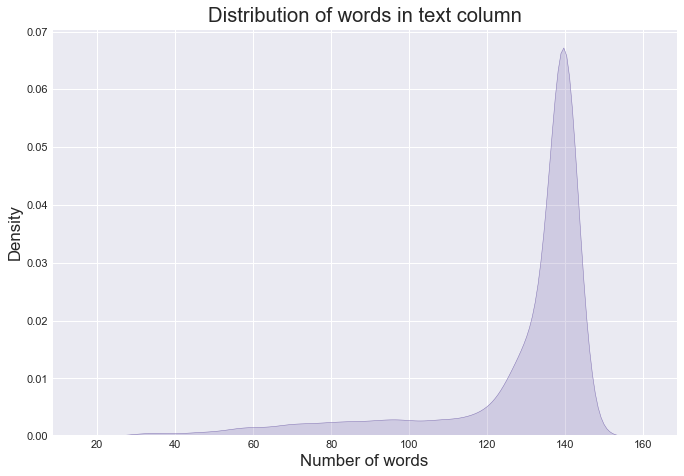

In [82]:
sns.set_style('darkgrid')

df["num of words in text"] = df["text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(df["num of words in text"],shade=True, color='m')
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

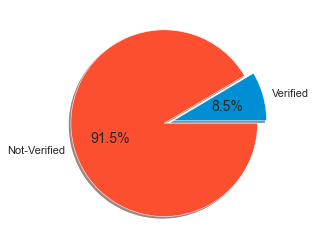

In [83]:
# Percentage of Verified and Non-verified users

dict_ = df['user_verified'].value_counts().to_dict()
dict_['Verified'] = dict_.pop(True)
dict_['Not-Verified'] = dict_.pop(False)

plt.figure(figsize=(4,4))
plt.pie(x=dict_.values(), labels=dict_.keys(), autopct='%1.1f%%', shadow=True, startangle=0, explode = [0.1, 0])
plt.show()

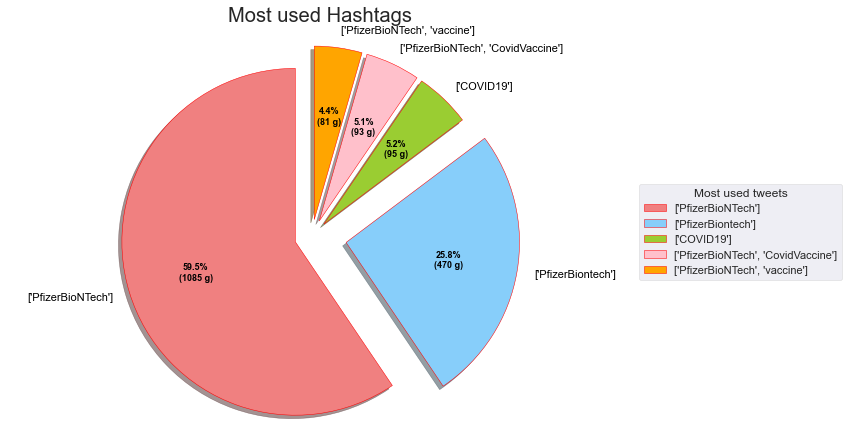

In [84]:
# Top 10 Most Used Hashtags in tweets

MostUsedTweets = df.hashtags.value_counts().sort_values(ascending=False)[:5]
colors = ['lightcoral', 'lightskyblue', 'yellowgreen', 'pink', 'orange']
explode = (0.1, 0.2, 0.1, 0.1, 0.1) 

# Wedge properties 
wp = { 'linewidth' : 0.5, 'edgecolor' : "red" }

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating the plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(MostUsedTweets,  
                                  autopct = lambda pct: func(pct, MostUsedTweets), 
                                  explode = explode,  
                                  labels = MostUsedTweets.keys(), 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, MostUsedTweets.keys(), 
          title ="Most used tweets", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 


plt.setp(autotexts, size=9, weight="bold") 
ax.set_title("Most used Hashtags") 
plt.axis('equal')
plt.show()

In [85]:
# Number of Tweets Made Per Day

df['tweet_date']=pd.to_datetime(df['date']).dt.date
tweet_date=df['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=False)

fig=go.Figure(go.Scatter(x=tweet_date['date'],
                                y=tweet_date['count'],
                               mode='markers+lines',
                               name="Submissions",
                               marker_color='dodgerblue'))

fig.update_layout(
    title_text='Tweets per Day : ({} - {})'.format(df['tweet_date'].sort_values()[0].strftime("%d/%m/%Y"),
                                                       df['tweet_date'].sort_values().iloc[-1].strftime("%d/%m/%Y")),template="plotly_dark",
    title_x=0.5)

fig.show()

<AxesSubplot:title={'center':'Day with maximun tweets'}, xlabel='day', ylabel='count'>

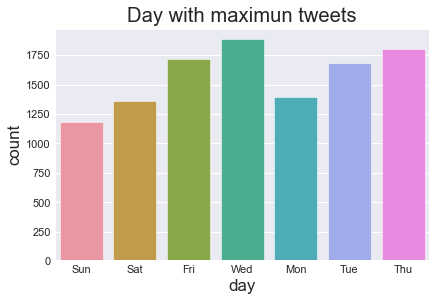

In [86]:
#Days With Maximum Number of Tweets

df["date"] = pd.to_datetime(df["date"])
df["Month"] = df["date"].apply(lambda x : x.month)
df["day"] = df["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["day"] = df["day"].map(dmap)
plt.title("Day with maximun tweets")
sns.countplot(df["day"])

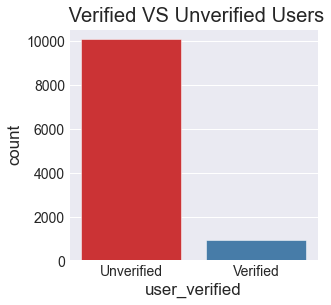

In [19]:
#Numer of verified and non verified users tweeted.

plt.figure(figsize=(4, 4))
sns.countplot(x ="user_verified",data=df, palette="Set1")
plt.title(" Verified VS Unverified Users")
plt.xticks([False,True],['Unverified','Verified'])
plt.show()

In [20]:
# Text Preprocessing

In [21]:
#Convert to lowercase
df.text = df['text'].str.lower()

#remove twitter handlers
df.text = df.text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
df.text = df.text.apply(lambda x:re.sub(r'\B#\S+','',x))

# Remove URLS
df.text = df.text.apply(lambda x:re.sub(r"http\S+", "", x))

# Replace all non alphabets.
df.text = df.text.apply(lambda x:re.sub("[^a-zA-Z0-9]", ' ', x))

#Remove all single characters
df.text = df.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
df.text = df.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# Replace 3 or more consecutive letters by 2 letter.
df.text = df.text.apply(lambda x:re.sub(r"(.)\1\1+",r"\1\1", x))

In [22]:
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [23]:
# Apply VADER Sentiment

In [24]:
data = df.fillna('')

In [26]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Manthan\AppData\Roaming\nltk_data...


True

Neutral     4874
Positive    4348
Negative    1798
Name: Sentiment, dtype: int64


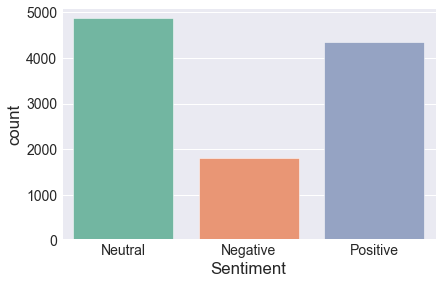

In [27]:
sentiment = SIA()
def get_sentiment(data):
    sentiment_list = []
    for text in list(data['text'].values):
        if sentiment.polarity_scores(text)["compound"] > 0:
            sentiment_list.append("Positive")
        elif sentiment.polarity_scores(text)["compound"] < 0:
            sentiment_list.append("Negative")
        else:
            sentiment_list.append("Neutral")
    return sentiment_list
        
data['Sentiment'] = get_sentiment(data)
sns.countplot(x="Sentiment", data=data, palette="Set2")
print(data.Sentiment.value_counts())

In [28]:

temp = data.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Greens')

,Sentiment,text
1,Neutral,4874
2,Positive,4348
0,Negative,1798


In [29]:
plt.figure(figsize=(12,6))

fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

<Figure size 864x432 with 0 Axes>

In [87]:
def get_word_cloud(sentiment):
    stop_words = (set(stopwords.words('english')))
    remove_words = ['vaccin', 'pfizerbiontech', 'coronavirus', 'pfizer', 'covid', 'covidvaccin', 'pfizervaccin']
    stop_words = remove_words + list(stop_words)
    plt.figure(figsize=[15,15])
    clean_tweets= "".join(list(data[data['Sentiment']==sentiment]['Tidy Tweet'].values))
    wordcloud = WordCloud(width=700,height=400, background_color='white',colormap='plasma', max_words=50, stopwords=stop_words, collocations=False).generate(clean_tweets)
    plt.title(f"Top 50 {sentiment} words used in tweets", fontsize=20)
    plt.imshow(wordcloud)
    return plt.show()

<AxesSubplot:title={'center':'Tweet count over a period of'}, xlabel='Date', ylabel='Count'>

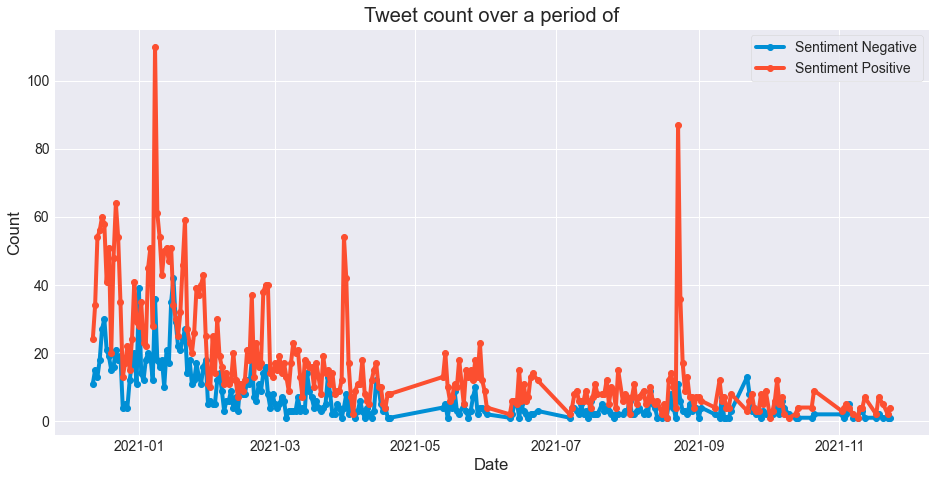

In [33]:

# Type of tweets made on vaccine over a period of time
data['date'] = pd.to_datetime(data['date']).dt.date
negative_data = data[data['Sentiment']=='Negative'].reset_index()
positive_data = data[data['Sentiment']=='Positive'].reset_index()
grouped_data_neg = negative_data.groupby('date')['Sentiment'].count().reset_index()
grouped_data_pos = positive_data.groupby('date')['Sentiment'].count().reset_index()
merged_data = pd.merge(grouped_data_neg, grouped_data_pos, left_on='date', right_on='date', suffixes=(' Negative', ' Positive'))

merged_data.plot(x='date', y=['Sentiment Negative', 'Sentiment Positive'], figsize=(14, 7), marker='o', xlabel='Date', ylabel='Count', title='Tweet count over a period of')

In [34]:
# Get the Positive, Neutral and Negative Sentiment Scores
sid = SIA()
data['sentiments']           = data['text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
data['Positive Sentiment']   = data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
data['Neutral Sentiment']    = data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
data['Negative Sentiment']   = data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

data.drop(columns=['sentiments'],inplace=True)

In [35]:
data.head(3)

,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,...,favorites,is_retweet,num of words in text,tweet_date,Month,day,Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,405,1692,3247,False,2020-12-20,same folks said daikon paste could treatcytoki...,['PfizerBioNTech'],...,0,False,97,2020-12-20,12,Sun,Neutral,0.000001,1.000001,0.000001
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",834,666,178,False,2020-12-13,while the world has been on the wrong side of ...,,...,1,False,140,2020-12-13,12,Sun,Negative,0.109001,0.766001,0.125001
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",10,88,155,False,2020-12-12,russian vaccine is created to last 2 4 years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",...,0,False,140,2020-12-12,12,Sat,Positive,0.250001,0.750001,0.000001


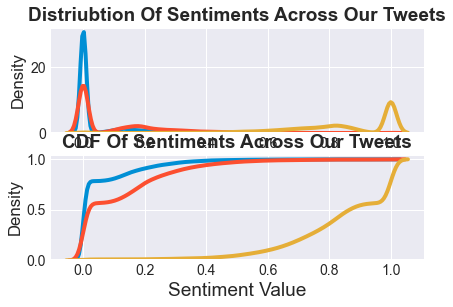

In [36]:
#Distribution Of Sentiments across the tweets

plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data['Negative Sentiment'],bw=0.1)
sns.kdeplot(data['Positive Sentiment'],bw=0.1)
sns.kdeplot(data['Neutral Sentiment'],bw=0.1)
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data['Negative Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(data['Positive Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(data['Neutral Sentiment'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.show()

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import random
plt.rc('figure',figsize=(17,13))

# Get Wordclouds For Positive and Negative Tweets

def get_word_cloud(sentiment):
    stop_words = (set(stopwords.words('english')))
    remove_words = ['vaccin', 'pfizerbiontech', 'coronavirus', 'pfizer', 'covid', 'covidvaccin', 'pfizervaccin']
    stop_words = remove_words + list(stop_words)
    plt.figure(figsize=[10,10])
    clean_tweets= "".join(list(data[data['Sentiment']==sentiment]['text'].values))
    wordcloud = WordCloud(width=700,height=400, background_color='white',colormap='plasma', max_words=50, stopwords=stop_words, collocations=False).generate(clean_tweets)
    plt.title(f"Top 50 {sentiment} words used in tweets", fontsize=20)
    plt.imshow(wordcloud)
    return plt.show()

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manthan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

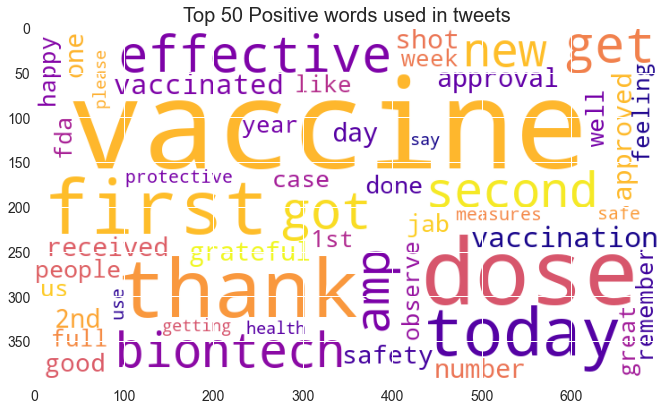

In [40]:
get_word_cloud(sentiment='Positive')

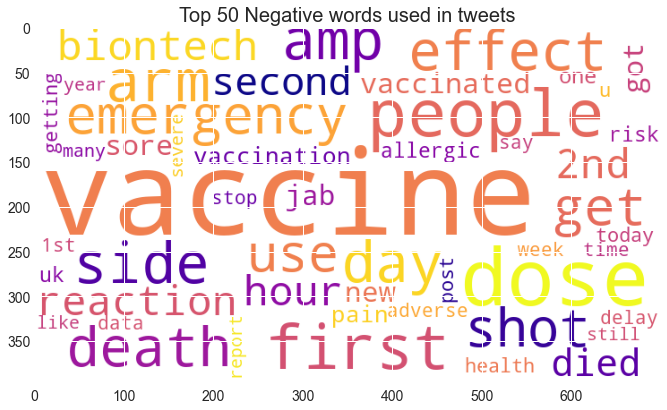

In [41]:
get_word_cloud(sentiment='Negative')

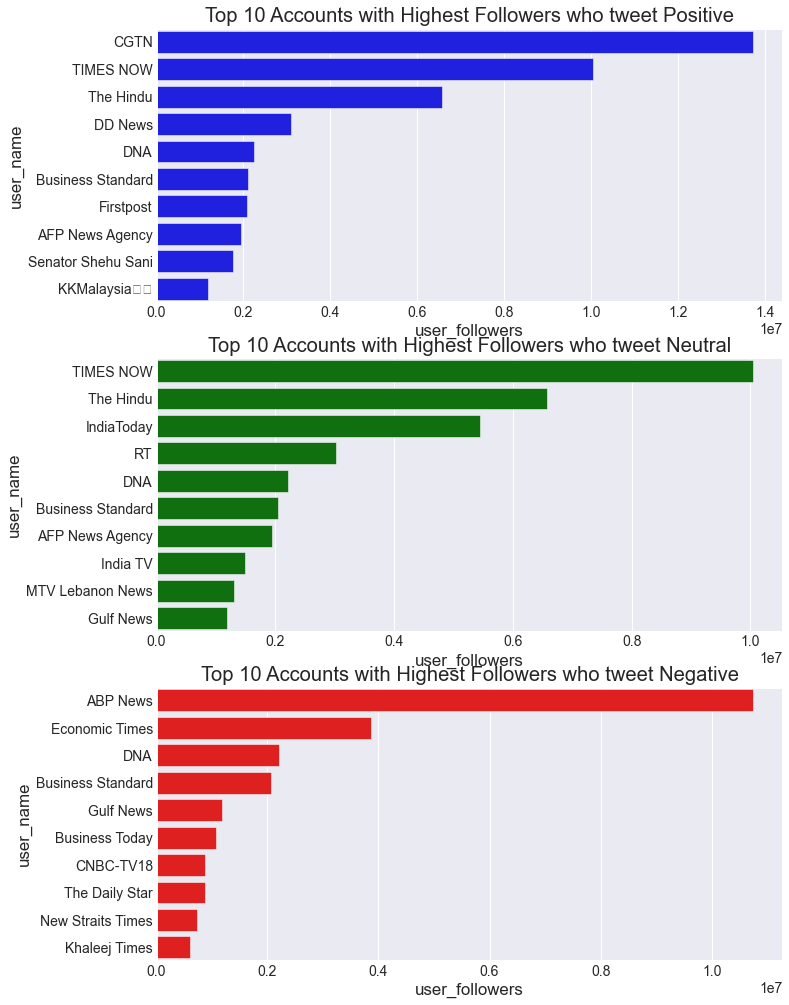

In [42]:
# Check the most followed (famous) users tweet

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 16))
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax1, palette=["b"],
           data=data[(data.Sentiment== "Positive")]\
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax1.set_title('Top 10 Accounts with Highest Followers who tweet Positive')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax2, palette=["g"],
           data=data[(data.Sentiment == "Neutral")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax2.set_title('Top 10 Accounts with Highest Followers who tweet Neutral')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax3, palette=["r"],
           data=data[(data.Sentiment == "Negative")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax3.set_title('Top 10 Accounts with Highest Followers who tweet Negative')

fig.show()

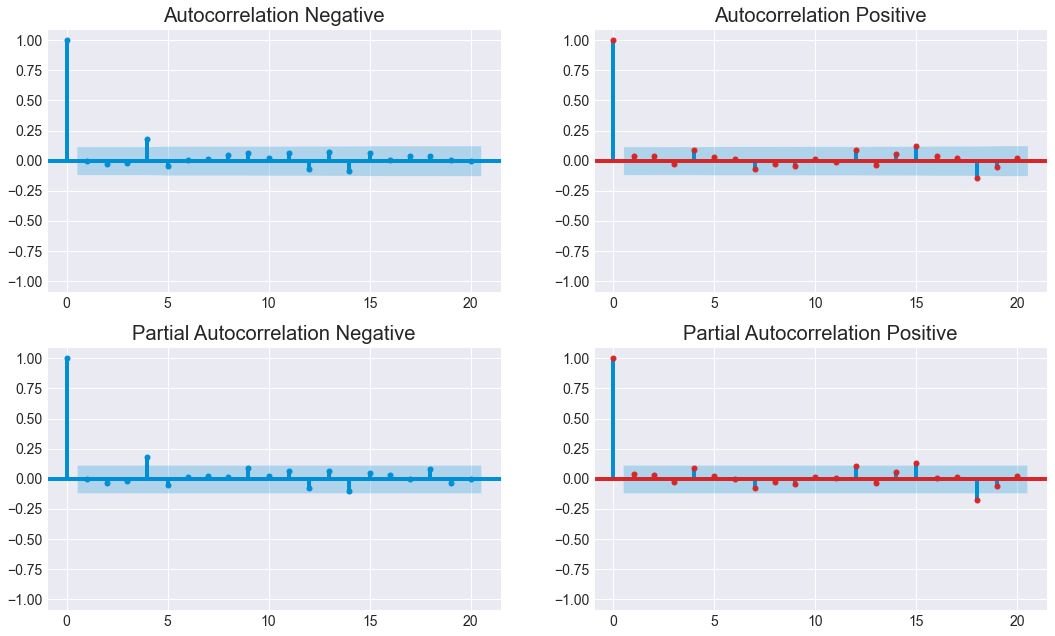

In [46]:
b_date_mean = data.groupby(by='date').mean().reset_index()
b_date_std = data.groupby(by='date').std().reset_index()

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


f, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
ax[0,0].set_ylim(-1.1,1.1)
ax[1,0].set_ylim(-1.1,1.1)
ax[0,1].set_ylim(-1.1,1.1)
ax[1,1].set_ylim(-1.1,1.1)

plot_acf(b_date_mean['Negative Sentiment'],lags=20, ax=ax[0,0],title='Autocorrelation Negative')
plot_pacf(b_date_mean['Negative Sentiment'],lags=20, ax=ax[1,0],title='Partial Autocorrelation Negative')
plot_acf(b_date_mean['Positive Sentiment'],lags=20, ax=ax[0,1],color='tab:red',title='Autocorrelation Positive')
plot_pacf(b_date_mean['Positive Sentiment'],lags=20, ax=ax[1,1],color='tab:red',title='Partial Autocorrelation Positive')
plt.show()

In [47]:
# Stop Word Removal and Lemmatization

In [48]:
df = data[['Sentiment','text']]

In [49]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Make Sure your intenrt is on :) 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

df['text'] = df['text'].apply(word_tokenize)
df.replace({'Negative': 0, 'Neutral':1 ,'Positive': 2}, inplace=True)

# Encoding 0 for negative, 1 for Neutral, 2 for Positive 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manthan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manthan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Manthan\AppData\Roaming\nltk_data...


In [50]:
stop = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop])

In [51]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]
df['text'] = df.text.apply(lemmatize_text)

In [52]:
#  Splitting the Data

In [53]:
X = df['text']
y = df['Sentiment']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42)


In [54]:
X_train,X_test,y_train,y_test = X_train.astype(str),X_test.astype(str),y_train.astype(str),y_test.astype(str)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  57756


In [56]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [57]:
# Model Building

In [58]:
# Evaluate Model Function

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print('\033[1m'+'\t\t\tClassification Report'+'\033[0m')
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.set(rc = {'figure.figsize':(8,8)})
    categories = ['Negative','Neutral','Positive']
    sns.heatmap(cf_matrix, annot=True,fmt='d',xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

			Classification Report
              precision    recall  f1-score   support

           0       0.81      0.40      0.53        88
           1       0.78      0.93      0.85       254
           2       0.86      0.86      0.86       209

    accuracy                           0.81       551
   macro avg       0.82      0.73      0.75       551
weighted avg       0.82      0.81      0.80       551



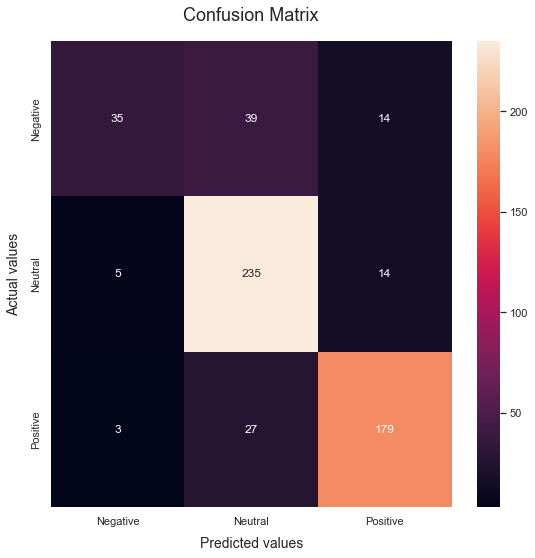

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
model_Evaluate(clf)

			Classification Report
              precision    recall  f1-score   support

           0       1.00      0.12      0.22        88
           1       0.76      0.87      0.81       254
           2       0.72      0.86      0.78       209

    accuracy                           0.75       551
   macro avg       0.83      0.62      0.61       551
weighted avg       0.78      0.75      0.71       551



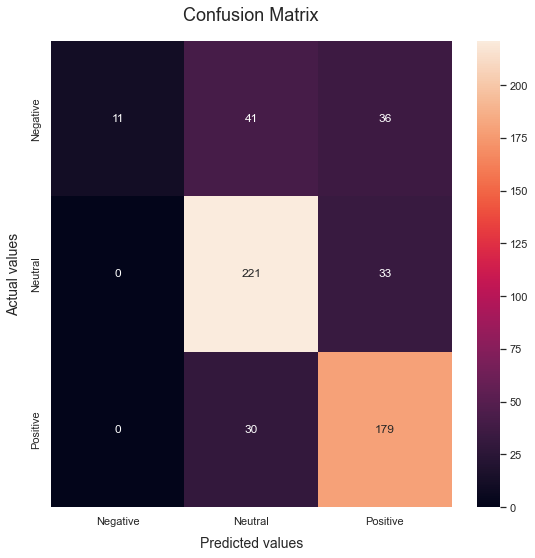

In [60]:
from sklearn.naive_bayes import MultinomialNB
BNBmodel = MultinomialNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

			Classification Report
              precision    recall  f1-score   support

           0       0.76      0.62      0.69        88
           1       0.86      0.90      0.88       254
           2       0.86      0.88      0.87       209

    accuracy                           0.85       551
   macro avg       0.83      0.80      0.81       551
weighted avg       0.84      0.85      0.84       551



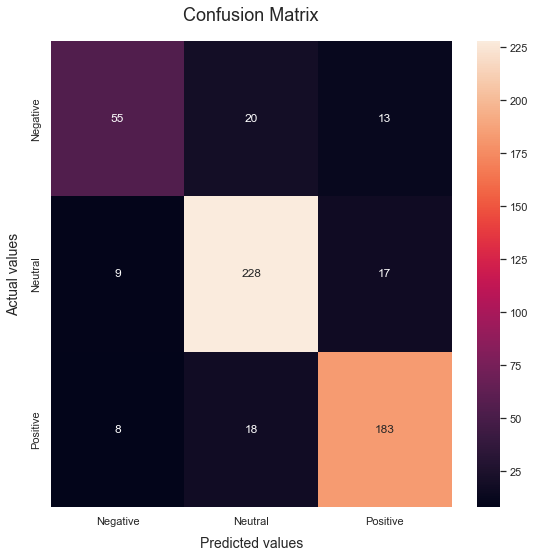

In [61]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()

SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

			Classification Report
              precision    recall  f1-score   support

           0       0.81      0.39      0.52        88
           1       0.73      0.97      0.84       254
           2       0.89      0.74      0.81       209

    accuracy                           0.79       551
   macro avg       0.81      0.70      0.72       551
weighted avg       0.81      0.79      0.78       551



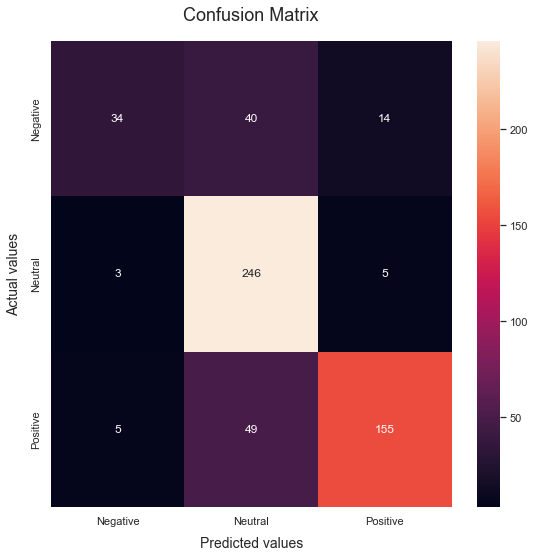

In [62]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier(max_depth=500,random_state=0)
random_model.fit(X_train, y_train)
model_Evaluate(random_model)